# Preprocesamiento de texto

Todas las tareas de limpieza y normalización que se aplicaron previamente han sido integradas en un solo fichero de funciones. Lass vamos a reutilizar para rápidamente preprocesar el archivo de mensajes de correo electrónico y aplicar posteriormente otras tareas de análisis.

**Referencias bibliográficas:**

- Deepanshi (2023). Text Preprocessing in NLP with Python Codes, Analytics Vidhya. Disponible en https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

## Dataset: correos electrónicos
- Dataset: Datos de spam de SMS para preprocesamiento de texto. Disponible en: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [1]:
#Comencemos importando la biblioteca pandas y leyendo los datos.
import pandas as pd

# Cargar el dataset, cada línea está compuesta por dos columnas:
# v1 contiene la etiqueta (ham o spam) y
# v2 contiene el texto sin formato.
# Además, algunas filas tienen celdas sin valor.
data = pd.read_csv("./spam.csv",encoding="ISO-8859-1",
                   header=None, skiprows=1,
                   names = ["target", "text", "v3", "v4", "v5"])

#Ampliación de ancho del display para ver mejor el texto de la columna de mensajes.
pd.set_option('display.max_colwidth', 300)

#Usar las dos primeras columnas y renombrarlas:
data= data [['target','text']]
data.sample(5, random_state=42)


,target,text
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens"
944,ham,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones"
1044,spam,"We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p"
2484,ham,Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.
812,spam,Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16


## 1. Limpieza de texto

Dependiendo de la naturaleza y calidad del texto a analizar, podemos aplicar diferentes técnicas como:

- Eliminación de URLs.
- Eliminación de etiquetas HTML.
- Eliminación de signos de puntuación o caracteres especiales (Removal of Punctuations).
- Eliminación de números (si es necesario).

Pero para asegurar una máxima eficiencia de las tareas de limpieza, vamos a convertir el texto en minúsculas (tarea que es parte de la **normalización de texto**).

Además, luego de *tokenizar a nivel de palabras*, podríamos aplicar otras técnicas de limpieza como: 

- Eliminación de palabras frecuentes (Removal of Frequent words).
- Eliminación de palabras raras (Removal of Rare words).
- Eliminación de emojis (Removal of Emojis).
- Eliminación de emoticones (Removal of Emoticons).
- Conversión de emoticones a palabras (Conversion of Emoticon to Words).
- Conversión de emojis a palabras (Conversion of Emoji to Words).
  Conversión de palabras de chat.


In [2]:
#Convertir el texto en minúsculas:
data['clean_text']= data['text'].apply(lambda x: x.lower())
data.sample(5)

,target,text,clean_text
5517,ham,Miles and smiles r made frm same letters but do u know d difference..? smile on ur face keeps me happy even though I am miles away from u.. :-)keep smiling.. Good nyt,miles and smiles r made frm same letters but do u know d difference..? smile on ur face keeps me happy even though i am miles away from u.. :-)keep smiling.. good nyt
1051,ham,Do u noe wat time e place dat sells 4d closes?,do u noe wat time e place dat sells 4d closes?
2573,spam,"Congrats 2 mobile 3G Videophones R yours. call 09063458130 now! videochat wid ur mates, play java games, Dload polypH music, noline rentl. bx420. ip4. 5we. 150p","congrats 2 mobile 3g videophones r yours. call 09063458130 now! videochat wid ur mates, play java games, dload polyph music, noline rentl. bx420. ip4. 5we. 150p"
4787,ham,"Thanx. Yup we coming back on sun. Finish dinner going back 2 hotel now. Time flies, we're tog 4 exactly a mth today. Hope we'll haf many more mths to come...","thanx. yup we coming back on sun. finish dinner going back 2 hotel now. time flies, we're tog 4 exactly a mth today. hope we'll haf many more mths to come..."
2710,spam,Hope you enjoyed your new content. text stop to 61610 to unsubscribe. help:08712400602450p Provided by tones2you.co.uk,hope you enjoyed your new content. text stop to 61610 to unsubscribe. help:08712400602450p provided by tones2you.co.uk


In [3]:
# Importar librerías necesarias:

import re
from bs4 import BeautifulSoup
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from preprocessing import remove_urls, remove_html, remove_punctuation, remove_emoji
from preprocessing import remove_hashtags_mentions, remove_numbers, replace_strings
from preprocessing import remove_stopwords, stemming_eng, lemmatizer_eng

In [4]:
# aplicar tareas de limpieza de texto que hagan falta:

# Colocar el texto en minúscula:
data['clean_text']= data['text'].apply(lambda x: x.lower())

#Eliminar URLs:
data['clean_text']= data['clean_text'].apply(lambda x:remove_urls(x))

#Eliminar signos de puntuación:
PUNCTUATION = """!"#$%&()*+,-./:;<=>?@[\]^_`{|}~"""
data['clean_text']= data['clean_text'].apply(lambda x:remove_punctuation(x, PUNCTUATION))

#Eliminar números:
data['clean_text']= data['clean_text'].apply(lambda x:remove_numbers(x))

# Reemplazar cadenas de texto por equivales (como las contracciones):
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]

patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
print(patterns)
data['clean_text']= data['clean_text'].apply(lambda x:replace_strings(x, patterns))

# Tokenizar texto:
wordnet_lemmatizer = WordNetLemmatizer() #defining the object for Lemmatization
data['tokenized_text']= data['clean_text'].apply(lambda x: word_tokenize(x))

#Eliminación de palabras vacias:
STOPWORDS = nltk.corpus.stopwords.words('english')
STOPWORDS = STOPWORDS + ['hi', 'ok', 'u', 'well', 'oh', 'ltgt']
print(STOPWORDS)
data['norm_text']= data['tokenized_text'].apply(lambda x: remove_stopwords(x, STOPWORDS))

#Lematizar:
wordnet_lemmatizer = WordNetLemmatizer() # #defining the object for Lemmatization
data['norm_text']=data['norm_text'].apply(lambda x:lemmatizer_eng(x, wordnet_lemmatizer))

[(re.compile("won\\'t"), 'will not'), (re.compile("can\\'t"), 'cannot'), (re.compile("i\\'m"), 'i am'), (re.compile("ain\\'t"), 'is not'), (re.compile("(\\w+)\\'ll"), '\\g<1> will'), (re.compile("(\\w+)n\\'t"), '\\g<1> not'), (re.compile("(\\w+)\\'ve"), '\\g<1> have'), (re.compile("(\\w+)\\'s"), '\\g<1> is'), (re.compile("(\\w+)\\'re"), '\\g<1> are'), (re.compile("(\\w+)\\'d"), '\\g<1> would'), (re.compile('&'), 'and'), (re.compile('dammit'), 'damn it'), (re.compile('dont'), 'do not'), (re.compile('wont'), 'will not')]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do',

In [5]:
data.sample(10, random_state=123)

,target,text,clean_text,tokenized_text,norm_text
3237,ham,Good. No swimsuit allowed :),good no swimsuit allowed,"[good, no, swimsuit, allowed]","[good, swimsuit, allowed]"
843,spam,"Urgent! call 09066350750 from your landline. Your complimentary 4* Ibiza Holiday or 10,000 cash await collection SAE T&Cs PO BOX 434 SK3 8WP 150 ppm 18+",urgent call from your landline your complimentary ibiza holiday or cash await collection sae tcs po box sk wp ppm,"[urgent, call, from, your, landline, your, complimentary, ibiza, holiday, or, cash, await, collection, sae, tcs, po, box, sk, wp, ppm]","[urgent, call, landline, complimentary, ibiza, holiday, cash, await, collection, sae, tc, po, box, sk, wp, ppm]"
3521,ham,"Im sorry bout last nite it wasnåÕt ur fault it was me, spouse it was pmt or sumthin! U 4give me? I think u shldxxxx",im sorry bout last nite it wasnåõt ur fault it was me spouse it was pmt or sumthin u give me i think u shldxxxx,"[im, sorry, bout, last, nite, it, wasnåõt, ur, fault, it, was, me, spouse, it, was, pmt, or, sumthin, u, give, me, i, think, u, shldxxxx]","[im, sorry, bout, last, nite, wasnåõt, ur, fault, spouse, pmt, sumthin, give, think, shldxxxx]"
2123,spam,+123 Congratulations - in this week's competition draw u have won the å£1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm,congratulations in this weeks competition draw u have won the å£ prize to claim just call b tcsstop sms over only ppm,"[congratulations, in, this, weeks, competition, draw, u, have, won, the, å£, prize, to, claim, just, call, b, tcsstop, sms, over, only, ppm]","[congratulation, week, competition, draw, å£, prize, claim, call, b, tcsstop, sm, ppm]"
738,ham,Wish i were with you now!,wish i were with you now,"[wish, i, were, with, you, now]",[wish]
923,ham,She went to attend another two rounds today..but still did't reach home..,she went to attend another two rounds todaybut still didt reach home,"[she, went, to, attend, another, two, rounds, todaybut, still, didt, reach, home]","[went, attend, another, two, round, todaybut, still, didt, reach, home]"
2977,ham,Yar lor... Keep raining non stop... Or u wan 2 go elsewhere?,yar lor keep raining non stop or u wan go elsewhere,"[yar, lor, keep, raining, non, stop, or, u, wan, go, elsewhere]","[yar, lor, keep, raining, non, stop, wan, go, elsewhere]"
4623,ham,Jus finish blowing my hair. U finish dinner already?,jus finish blowing my hair u finish dinner already,"[jus, finish, blowing, my, hair, u, finish, dinner, already]","[jus, finish, blowing, hair, finish, dinner, already]"
4388,ham,"K I'm ready, &lt;#&gt; ?",k im ready ltgt,"[k, im, ready, ltgt]","[k, im, ready]"
4931,ham,Match started.india &lt;#&gt; for 2,match startedindia ltgt for,"[match, startedindia, ltgt, for]","[match, startedindia]"


Luego del preprocesamiento, observamos que algunos tokens aún se pueden limpiar. Ahora vamos a ver las palabras más frecuentes a través de una nube de etiquetas.

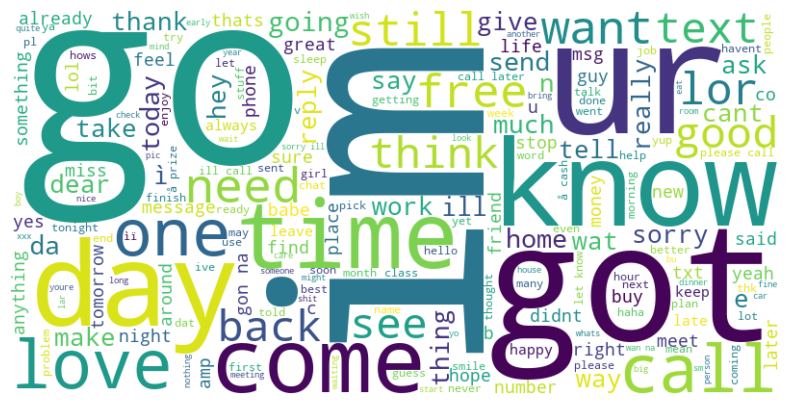

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Visualizar nube de palabras del texto original:
def viz_wordcloud(text):
    # Crear el objeto WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Mostrar la nube de palabras utilizando matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

sentences = [' '.join(w) for w in data['norm_text'].to_list()] # unir todos los tokens de un mensaje en un solo string

stream = ' '.join(sentences) # juntar todos los textos en un solo stream

viz_wordcloud(stream)

# 2. Análisis semántico de texto

Las técnicas de análisis semántico nos permiten extraer el significado y la intención de un texto, lo cual es clave para una amplia variedad de aplicaciones, desde la clasificación de documentos hasta los asistentes virtuales.


### 2.1 PoS tagging

PoS tagging se enfoca en identificar la parte del discurso de cada palabra dentro de una oración, como sustantivo, verbo, adjetivo, etc.

La clasificación de etiquetas PoS es la siguiente:

- DT: Determinante
- JJ: Adjetivo
- NN: Nombre en singular
- NNS: Nombre en plural
- VBD: Verbo en pasado
- VBG: Verbo en gerundio
- MD: Verbo modal
- IN: Preposición o conjunción subordinada
- PRP: Pronombre
- RB: Adverbio
- RP: Partícula
- CC: Conjunción coordinada
- CD: Numeral

Para identificar las categorías de cada palabra debemos partir del texto tokenizado y en el mejor de los casos normalizado (lematizado).

Para realizar el etiquetado, vamos a usar **pos_tag** de nltk

In [7]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [8]:
# nltk.download('averaged_perceptron_tagger')
t = ['Galapagos', 'is', 'a', 'great', 'place']
pt = ['galapagos', 'great', 'place']
#Categorías de la frase sin procesar:
opinion_tokens_tagged = nltk.pos_tag(t)
print(opinion_tokens_tagged)

#Categorías de la frase procesada:
nltk.pos_tag(pt)

[('Galapagos', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('place', 'NN')]


[('galapagos', 'NNS'), ('great', 'JJ'), ('place', 'NN')]

Como observamos, un token etiquetado se representa mediante una tupla que consta del token y la etiqueta. 

Las etiquetas como 'DT' (determinante), 'IN' (preposición) y otras pueden ser usadas para seguir limpiando texto.

Para etiquetar texto en español podemos usar spacy y un modelo en español.

In [9]:
import es_core_news_sm
nlp = es_core_news_sm.load()
doc = nlp("Galápagos es un gran lugar.")
print([(w.text, w.pos_) for w in doc])

ValueError: 'in' is not a valid parameter name

Ahora sí vamos a ver cómo aplicarlo al **dataset de mensajes de correo analizado**.

In [20]:
data[['text','norm_text']]

,text,norm_text
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,Ok lar... Joking wif u oni...,"[lar, joking, wif, oni]"
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,"[free, entry, wkly, comp, win, fa, cup, final, tkts, st, may, text, fa, receive, entry, questionstd, txt, ratetcs, apply, over]"
3,U dun say so early hor... U c already then say...,"[dun, say, early, hor, c, already, say]"
4,"Nah I don't think he goes to usf, he lives around here though","[nah, think, go, usf, life, around, though]"
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.","[nd, time, tried, contact, å£, pound, prize, claim, easy, call, p, per, minute, btnationalrate]"
5568,Will Ì_ b going to esplanade fr home?,"[ì, b, going, esplanade, fr, home]"
5569,"Pity, * was in mood for that. So...any other suggestions?","[pity, mood, soany, suggestion]"
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,"[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, u, free]"


In [10]:
#Crear un stream de texto que recoja todas las opiniones
sentences = [' '.join(w) for w in data['norm_text'].to_list()] # unir todos los tokens de un mensaje en un solo string
print(sentences[:2])

stream = '. '.join(sentences) # juntar todos los textos en un solo stream
print(stream[:200])


['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'lar joking wif oni']
go jurong point crazy available bugis n great world la e buffet cine got amore wat. lar joking wif oni. free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs 


In [11]:
# Volver a tokenizar todo el texto
opinion_tokens = [w for w in word_tokenize(stream) if re.match("^[a-zA-Z]+.*", w)]
print(opinion_tokens[:5])

#Etiquetar cada token:
opinion_tokens_tagged = nltk.pos_tag(opinion_tokens)

print(opinion_tokens_tagged[:10])


['go', 'jurong', 'point', 'crazy', 'available']
[('go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN')]


## 2.2 NER

En esta parte detectarermos entidades numeradas utilizando tanto SpaCy con transformers como transformers simplemente. En el segundo caso usando una librería llamada simple transformers.

Por otro lado, también haremos Named Entity Linking (NEL) donde buscaremos entidades linkadas a una base de conocimiento (KB), en este caso DBpedia. Encontraremos los enlaces a Wikpedia de ciertas entidades del texto, utilizando DBPedia Spotlight.

# 2.2.1 Detección de entidades nombradas (NER) usando spaCy

En esta sección usaremos spaCy para detectar NER. A partir de un corpus de CONLL 2003.

In [ ]:
!pip install spacy==3.2.0

!python -m spacy download en_core_web_sm-3.2.0 --direct

In [12]:
def get_tokens_to_print(model, text):
  """Print tokens of the text and its relevant attributes.

    Parameters:
      model (spaCy model): spaCy model used for tokenization
      text (str):  text to transform in a spaCy doc class.

    Returns: ---
  """
  doc = model(text)
  print (f"The text:\n\n{get_text_to_print(text)}\n\nwas converted in a spaCy object: {type(doc)}\n")
  print (f"Token-based analysis. Each token is a spaCy object: {type(doc[0])}\n")

  # We obtain rows to print: headers and content
  rows  = []
  # head_align: List of tuples. Each tuple: heather and its alignment when printing
  head_align  = [('Token', '<'), ('Lemma', '<'), ('Syntactic parent', '<'), ('#Tok', '>'), ('Chr_Start', '>'), ('Chr_End', '>'), ('POS', '<'),
                 ('TAG', '<'), ('TAG meaning:', '<'), ('ENT', '<'), ('DEP', '<'), ('DEP meaning:', '<')]
  head, align = list(zip(*head_align))
  rows.append(head)                           # Header
  rows.append(['='*len(i) for i in head])     # Underline headers
  for tok in doc:
    rows.append([tok.text, tok.lemma_, tok.head.text, str(tok.i), str(tok.idx), str(tok.idx+len(tok)-1), tok.pos_,
                 tok.tag_, str(spacy.explain(tok.tag_))[:20], tok.ent_type_, tok.dep_, str(spacy.explain(tok.dep_))[:20]])

  # Width of each column: the witdh of the longest element
  columns       = zip(*rows)
  column_widths = [max(len(i) for i in col) for col in columns]

  # Print the files with alignment
  for row in rows:
    print(*[f"{row[i]:{align[i]}{column_widths[i]}}  " for i in range(0, len(row))])


def get_text_to_print(text):
  """Format given text.

    Parameters:
      text (str): text to print

    Returns:
      str: text formatted in 100 character lines with an initial line numbering the characters
  """
  line_length = 100
  line_poss   = "     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100"
  text        = text.replace("\n", " ")     # In order to avoid that the \n character produces a line change.
  text        = text.replace("\r", " ")     # In wikipedia texts we have detected the character '\r' that, if interpreted, may induce some printing problems.
  text_format = "\n".join([ f"{i//line_length:<5}{text[i:i+line_length]}"  for i in range(0, len(text), line_length) ])
  return line_poss + "\n" + text_format + "\n" + line_poss

In [14]:
import spacy

model_ner = spacy.load("en_core_web_sm")

ImportError: cannot import name 'PlainTextCorpus' from 'spacy.training.corpus' (c:\Users\usuario\.conda\envs\env_master\Lib\site-packages\spacy\training\corpus.py)

In [62]:
text = "Quito is the capital of Ecuador"

In [63]:
get_tokens_to_print(model_ner, text)

The text:

     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100
0    Quito is the capital of Ecuador
     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100

was converted in a spaCy object: <class 'spacy.tokens.doc.Doc'>

Token-based analysis. Each token is a spaCy object: <class 'spacy.tokens.token.Token'>

Token     Lemma     Syntactic parent   #Tok   Chr_Start   Chr_End   POS     TAG   TAG meaning:           ENT   DEP     DEP meaning:          
=====     =====     ================   ====   =========   =======   ===     ===   ============           ===   ===     ============          
Quito     Quito     is                    0           0         4   PROPN   NNP   noun, proper singula   GPE   nsubj   nominal subject       
is        be        is                    1           6         7   AUX     VBZ   verb, 3rd person sin         ROOT    root                  
the       the     